# Import all the required libraries

---



In [19]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [20]:


START = "2010-01-04"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [21]:
data = load_data('AAPL')
df=data
df.head()

[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358410,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [22]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


Visualizing Closing Price

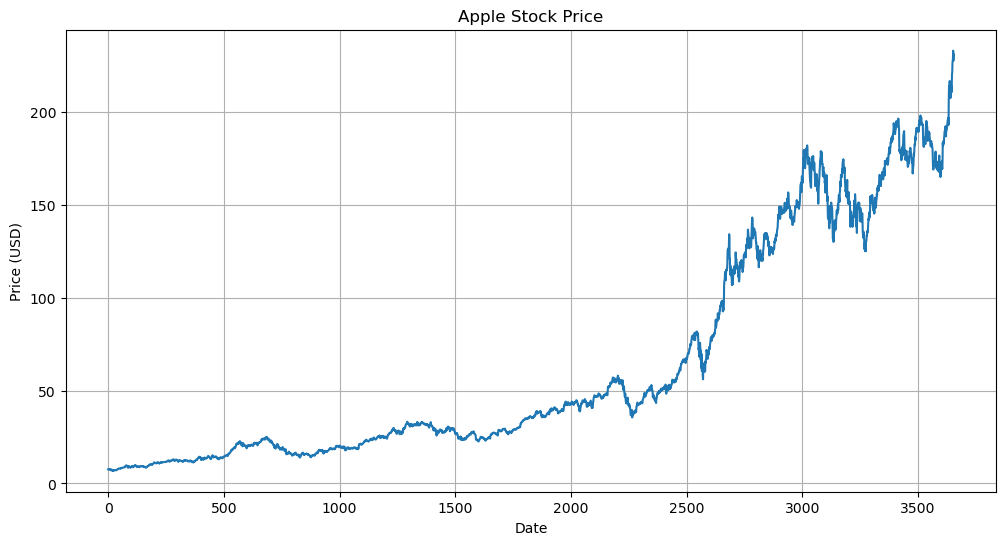

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title("Apple Stock Price")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [24]:
df

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800
...,...,...,...,...,...
3650,227.089996,227.850006,223.250000,227.820007,59085900
3651,227.929993,229.399994,226.369995,228.679993,48076100
3652,229.300003,233.080002,229.250000,232.979996,62627700
3653,231.389999,232.389999,225.770004,227.570007,64710600


# Plotting moving averages of 100 day

---



In [25]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3650    185.0734
3651    185.5098
3652    185.9981
3653    186.4352
3654    186.9220
Name: Close, Length: 3655, dtype: float64

Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

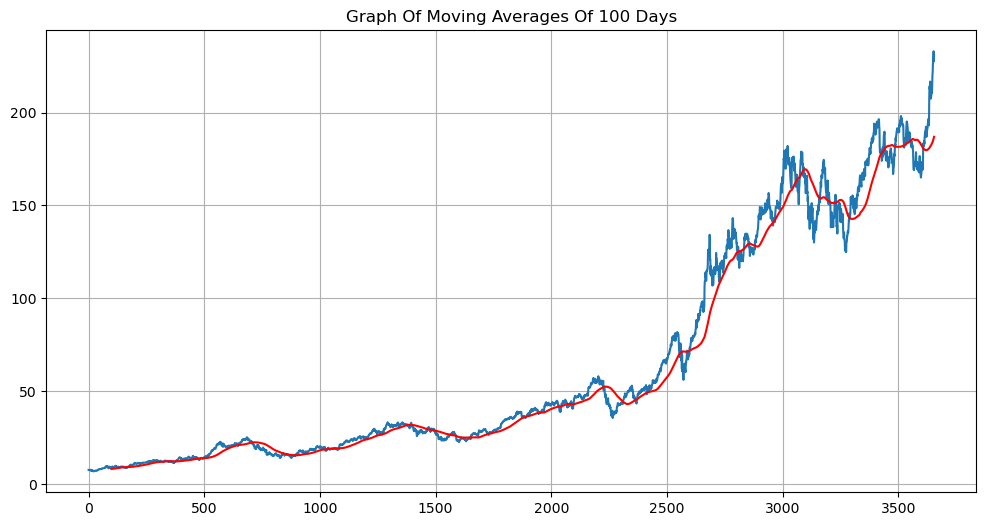

In [26]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.grid(True)
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [27]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3650    184.84950
3651    185.11545
3652    185.41070
3653    185.67460
3654    185.94915
Name: Close, Length: 3655, dtype: float64

Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

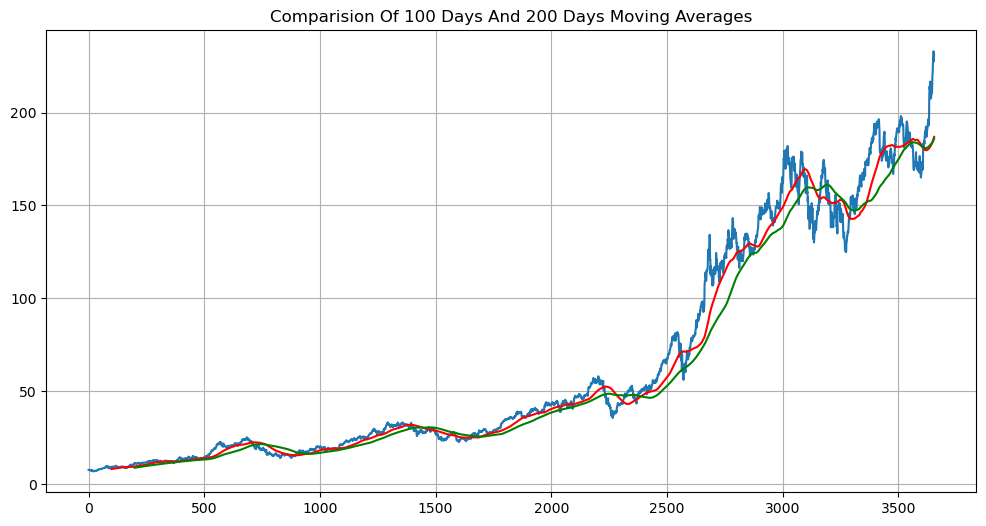

In [28]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.grid(True)
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [29]:
df.shape

(3655, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [30]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(2558, 7)
(1097, 7)


In [31]:
train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.461976,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.473148,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.370184,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.358410,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.400682,447610800


In [32]:
test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2558,2020-03-04,74.110001,75.849998,73.282501,75.684998,73.715561,219178400
2559,2020-03-05,73.879997,74.887497,72.852501,73.230003,71.324463,187572800
2560,2020-03-06,70.500000,72.705002,70.307503,72.257500,70.377274,226176800
2561,2020-03-09,65.937500,69.522499,65.750000,66.542503,64.810989,286744800
2562,2020-03-10,69.285004,71.610001,67.342499,71.334999,69.478783,285290000


# Using MinMax scaler for normalization of the dataset

---



In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [34]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [35]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.01046536],
       [0.01064169],
       [0.0090166 ],
       ...,
       [0.82039213],
       [0.90529221],
       [0.87363403]])

In [36]:
x_train = []
y_train = [] 

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train) 

In [37]:
x_train.shape

(2458, 100, 1)

# ML Model (LSTM)

---



In [38]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [39]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

/home/kkp/.local/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [41]:
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
model.fit(x_train, y_train,epochs = 100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 250ms/step - loss: 0.0501 - mean_absolute_error: 0.1610
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 28s 364ms/step - loss: 0.0051 - mean_absolute_error: 0.0494
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 27s 345ms/step - loss: 0.0039 - mean_absolute_error: 0.0424
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 26s 338ms/step - loss: 0.0039 - mean_absolute_error: 0.0418
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 202ms/step - loss: 0.0038 - mean_absolute_error: 0.0420
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - loss: 0.0040 - mean_absolute_error: 0.0437
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 209ms/step - loss: 0.0034 - mean_absolute_error: 0.0383
Epoch 8/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 0.0033 - mean_absolute_error: 0.0402
Epoch 9/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - loss: 0.0036 - mean_absolute_error: 0.0428
Epoch 10/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 16s 207ms/step - loss: 0.0027 - mean_absolute_error: 0.0361
Epoch 11/

In [42]:
model.save('keras_model.h5')

In [43]:
test_close.shape

(1097, 1)

In [44]:
past_100_days = pd.DataFrame(train_close[-100:])

In [45]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [46]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)


In [47]:
final_df.head()

,0
0,56.757500
1,57.522499
2,59.052502
3,58.967499
4,58.830002


In [48]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.00375946],
       [0.00808424],
       [0.01673382],
       ...,
       [1.        ],
       [0.96941565],
       [0.98874997]])

In [49]:
input_data.shape

(1197, 1)

# Testing the model

---



In [50]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [51]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(1097, 100, 1)
(1097,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [52]:
# Making predictions

y_pred = model.predict(x_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 164ms/step


In [53]:
y_pred.shape

(1097, 1)

In [54]:
y_test

array([0.11076249, 0.09688364, 0.09138577, ..., 1.        , 0.96941565,
       0.98874997])

In [55]:
y_pred

array([[0.1359131 ],
       [0.13410062],
       [0.13214989],
       ...,
       [0.87598044],
       [0.88999313],
       [0.9022208 ]], dtype=float32)

In [56]:
scaler.scale_

array([0.00565331])

In [57]:
scale_factor = 1/0.00041967
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

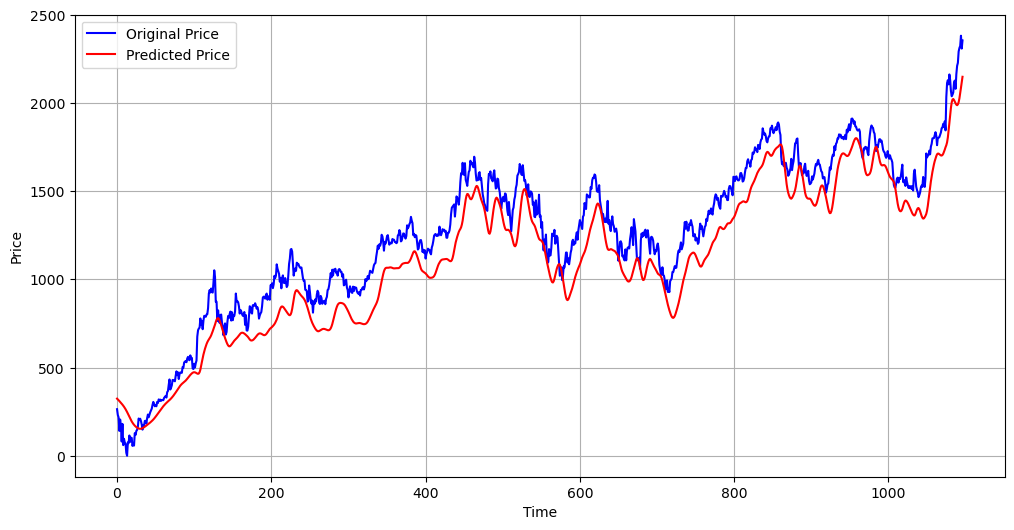

In [58]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Model evaluation

Calculation of mean absolute error

In [59]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 100
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 12.04%


Calculation of R2 score

In [60]:
from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8570916215463842


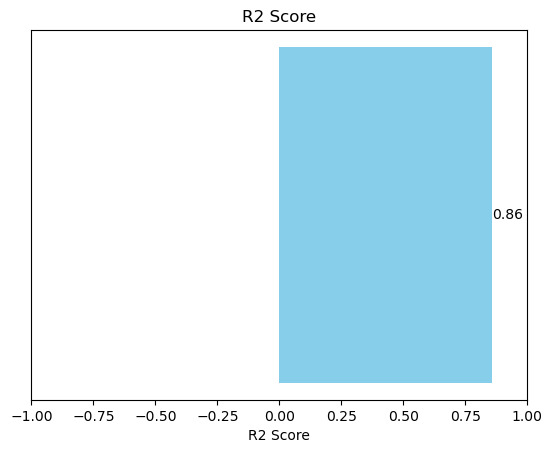

In [61]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

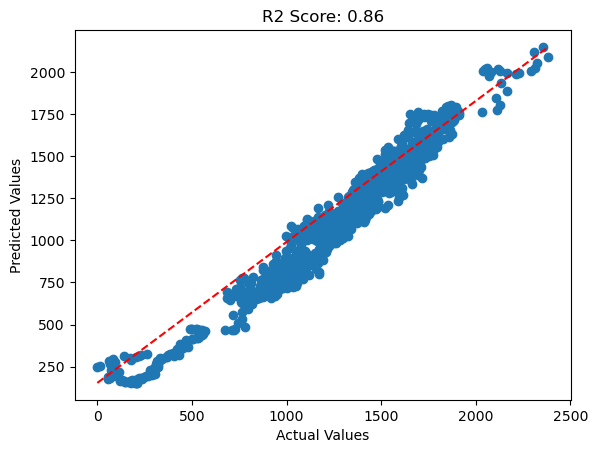

In [62]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()